## Image Classification


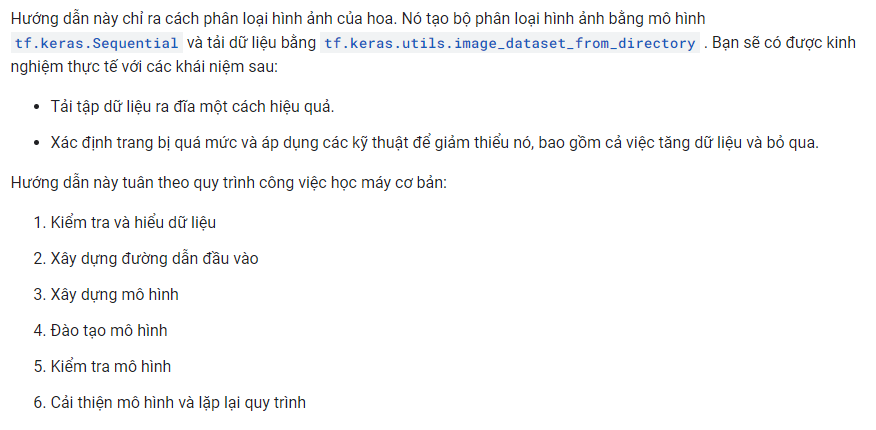

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Tải xuống và khám phá tập dữ liệu
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 23s 0us/step


In [3]:
#Có tổng cộng 3.670 hình ảnh
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


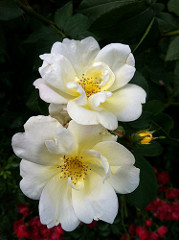

In [4]:
#Hiển thị loại hoa hồng
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

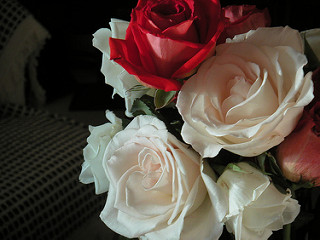

In [5]:
PIL.Image.open(str(roses[1]))

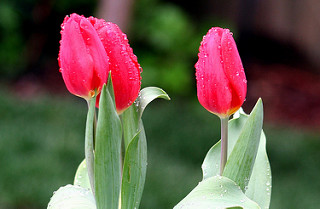

In [6]:
#hiển thị hoa tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Tạo tập dữ liệu

In [7]:
batch_size=32
img_height=180
img_width=180
train_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds=tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Trực quan hóa dữ liệu

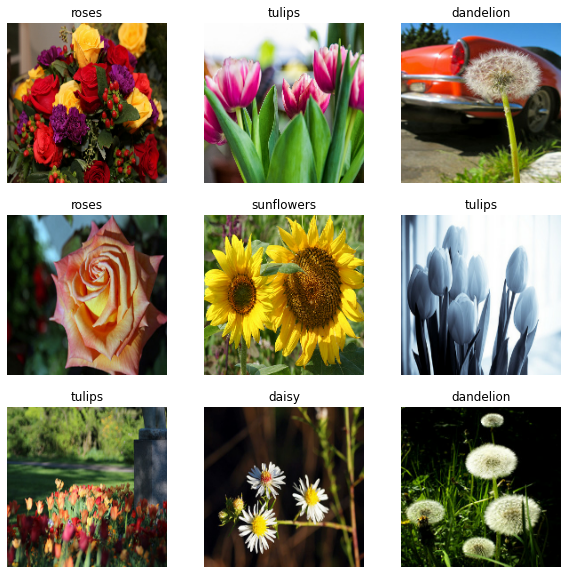

In [11]:
import matplotlib.pyplot as plt
#9 hình ảnh đầu tiên của tập dữ liệu
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [16]:
image_batch.numpy()


array([[[[8.33333313e-01, 4.22777748e+01, 6.48148209e-02],
         [1.97222269e+00, 6.93611069e+01, 1.00000000e+00],
         [1.43888903e+01, 8.00370331e+01, 2.59258926e-01],
         ...,
         [2.94447827e+00, 3.42221870e+01, 1.57404602e-01],
         [8.30559826e+00, 2.89999599e+01, 0.00000000e+00],
         [1.17777815e+01, 2.10555420e+01, 8.79633605e-01]],

        [[3.05555552e-01, 4.07500000e+01, 8.05555582e-01],
         [1.75000036e+00, 6.77500000e+01, 8.33333731e-02],
         [1.44722242e+01, 8.07500000e+01, 5.00000000e-01],
         ...,
         [1.11114502e+00, 3.58610687e+01, 4.72213745e-01],
         [6.33337402e+00, 3.05832977e+01, 0.00000000e+00],
         [9.91667175e+00, 2.38610992e+01, 2.52778625e+00]],

        [[9.35185254e-01, 4.00555573e+01, 1.87037051e+00],
         [3.33333397e+00, 6.68333282e+01, 0.00000000e+00],
         [1.54814835e+01, 8.06759262e+01, 0.00000000e+00],
         ...,
         [8.05547237e-01, 3.82406616e+01, 1.57404613e+00],
         [

In [15]:
labels_batch.numpy()

array([1, 2, 3, 3, 1, 2, 4, 4, 4, 4, 1, 4, 3, 1, 2, 1, 0, 3, 3, 0, 4, 3,
       3, 1, 4, 1, 4, 4, 1, 1, 1, 1])

## Định cấu hình tập dữ liệu cho hiệu suất

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Chuẩn hóa dữ liệu

In [18]:
normalization_layer = layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [21]:
image_batch[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.24967322, 0.13202615, 0.        ],
        [0.24705884, 0.12941177, 0.        ],
        [0.24934642, 0.13169935, 0.        ],
        ...,
        [0.24967317, 0.13398689, 0.        ],
        [0.2509804 , 0.13398695, 0.        ],
        [0.2509804 , 0.13333334, 0.        ]],

       [[0.24705884, 0.12941177, 0.        ],
        [0.24803923, 0.13039216, 0.        ],
        [0.2509804 , 0.13333334, 0.        ],
        ...,
        [0.24967317, 0.13692807, 0.00457512],
        [0.24705872, 0.13790864, 0.00784338],
        [0.2509804 , 0.13333334, 0.        ]],

       [[0.24705884, 0.12941177, 0.        ],
        [0.2509804 , 0.13333334, 0.        ],
        [0.25      , 0.13235295, 0.        ],
        ...,
        [0.2445534 , 0.13278869, 0.        ],
        [0.24575149, 0.13006526, 0.00196084],
        [0.2509804 , 0.13333334, 0.        ]],

       ...,

       [[0.2509804 , 0.13333334, 0.        ],
        [0.25

## Tạo mô hình

In [22]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [26]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 47s 500ms/step - loss: 1.3854 - accuracy: 0.4169 - val_loss: 1.0640 - val_accuracy: 0.5790
Epoch 2/10
92/92 [==============================] - 61s 662ms/step - loss: 0.9781 - accuracy: 0.6264 - val_loss: 0.9841 - val_accuracy: 0.6144
Epoch 3/10
92/92 [==============================] - 54s 590ms/step - loss: 0.7490 - accuracy: 0.7190 - val_loss: 1.0047 - val_accuracy: 0.6117
Epoch 4/10
92/92 [==============================] - 49s 529ms/step - loss: 0.5384 - accuracy: 0.8086 - val_loss: 1.0238 - val_accuracy: 0.6308
Epoch 5/10
92/92 [==============================] - 50s 546ms/step - loss: 0.3605 - accuracy: 0.8685 - val_loss: 1.2309 - val_accuracy: 0.6240
Epoch 6/10
92/92 [==============================] - 49s 539ms/step - loss: 0.2181 - accuracy: 0.9271 - val_loss: 1.5462 - val_accuracy: 0.5817
Epoch 7/10
92/92 [==============================] - 51s 559ms/step - loss: 0.1217 - accuracy: 0.9612 - val_loss: 1.7825 - val_accuracy: 0.6090

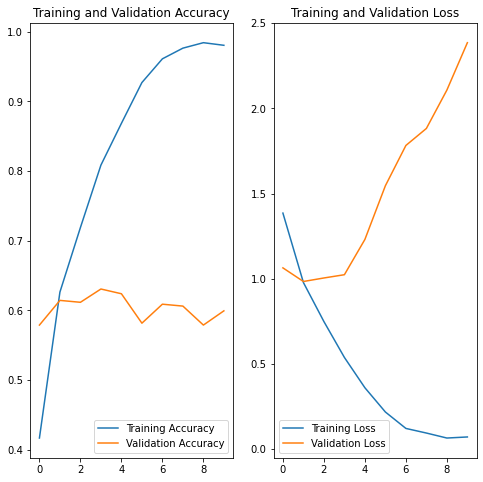

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.evaluate(val_ds)

23/23 [==============================] - 2s 96ms/step - loss: 2.3856 - accuracy: 0.5995


[2.385633945465088, 0.5994550585746765]

## Tăng dữ liệu

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

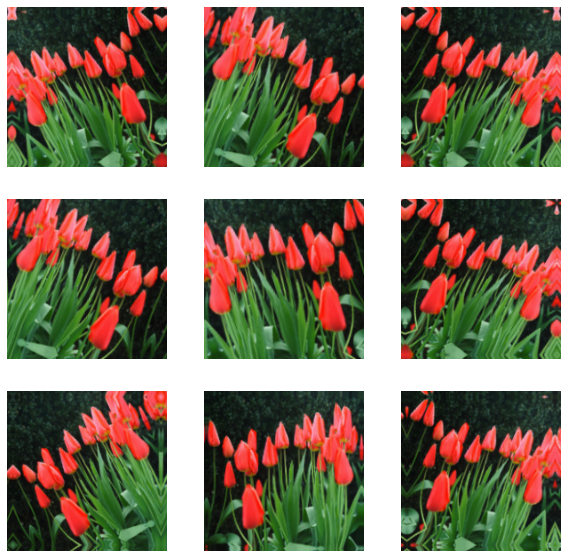

In [32]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off");

In [33]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [36]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 49s 499ms/step - loss: 1.3723 - accuracy: 0.4189 - val_loss: 1.1860 - val_accuracy: 0.5450
Epoch 2/15
92/92 [==============================] - 50s 547ms/step - loss: 1.0122 - accuracy: 0.6097 - val_loss: 0.9938 - val_accuracy: 0.5940
Epoch 3/15
92/92 [==============================] - 58s 630ms/step - loss: 0.9158 - accuracy: 0.6461 - val_loss: 0.9704 - val_accuracy: 0.6185
Epoch 4/15
92/92 [==============================] - 48s 518ms/step - loss: 0.8375 - accuracy: 0.6723 - val_loss: 0.8999 - val_accuracy: 0.6390
Epoch 5/15
92/92 [==============================] - 52s 562ms/step - loss: 0.7722 - accuracy: 0.7033 - val_loss: 0.8795 - val_accuracy: 0.6580
Epoch 6/15
92/92 [==============================] - 51s 553ms/step - loss: 0.7638 - accuracy: 0.7030 - val_loss: 0.8285 - val_accuracy: 0.6894
Epoch 7/15
92/92 [==============================] - 50s 544ms/step - loss: 0.7051 - accuracy: 0.7313 - val_loss: 0.8525 - val_accuracy: 0.6839

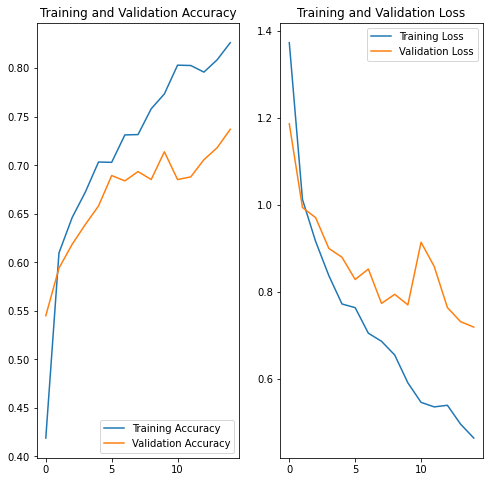

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
sunflower_url = "https://th.bing.com/th/id/OIP.QllEfSOLBgyNiLlR1qUgxAHaFj?w=260&h=195&c=7&r=0&o=5&pid=1.7"
sunflower_path = tf.keras.utils.get_file(origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 51ms/step
This image most likely belongs to sunflowers with a 99.95 percent confidence.


# modun tf.image

In [1]:
import tensorflow as tf

## image processing

### resizing

In [2]:
tf.image.resize
tf.image.resize_with_pad
tf.image.resize_with_crop_or_pad

<function tensorflow.python.ops.image_ops_impl.resize_image_with_crop_or_pad(image, target_height, target_width)>

### Converting Between Colorspaces

In [3]:
tf.image.rgb_to_grayscale,tf.image.grayscale_to_rgb
tf.image.rgb_to_hsv,tf.image.hsv_to_rgb
tf.image.rgb_to_yiq,tf.image.yiq_to_rgb
tf.image.rgb_to_yuv,tf.image.yuv_to_rgb
tf.image.image_gradients
tf.image.convert_image_dtype

<function tensorflow.python.ops.image_ops_impl.convert_image_dtype(image, dtype, saturate=False, name=None)>

### Image Adjustments

In [4]:
tf.image.adjust_brightness
tf.image.adjust_contrast
tf.image.adjust_gamma
tf.image.adjust_hue
tf.image.adjust_jpeg_quality
tf.image.adjust_saturation
tf.image.random_brightness
tf.image.random_contrast
tf.image.random_hue
tf.image.random_saturation
tf.image.per_image_standardization

<function tensorflow.python.ops.image_ops_impl.per_image_standardization(image)>

### Working with Bounding Boxes

In [5]:
tf.image.draw_bounding_boxes
tf.image.combined_non_max_suppression
tf.image.generate_bounding_box_proposals
tf.image.non_max_suppression
tf.image.non_max_suppression_overlaps
tf.image.non_max_suppression_padded
tf.image.non_max_suppression_with_scores
tf.image.pad_to_bounding_box
tf.image.sample_distorted_bounding_box

<function tensorflow.python.ops.image_ops_impl.sample_distorted_bounding_box_v2(image_size, bounding_boxes, seed=0, min_object_covered=0.1, aspect_ratio_range=None, area_range=None, max_attempts=None, use_image_if_no_bounding_boxes=None, name=None)>

### Cropping

In [6]:
tf.image.central_crop
tf.image.crop_and_resize
tf.image.crop_to_bounding_box
tf.io.decode_and_crop_jpeg
tf.image.extract_glimpse
tf.image.random_crop
tf.image.resize_with_crop_or_pad

<function tensorflow.python.ops.image_ops_impl.resize_image_with_crop_or_pad(image, target_height, target_width)>

### Flipping, Rotating and Transposing

In [7]:
tf.image.flip_left_right
tf.image.flip_up_down
tf.image.random_flip_left_right
tf.image.random_flip_up_down
tf.image.rot90
tf.image.transpose

<function tensorflow.python.ops.image_ops_impl.transpose(image, name=None)>

### Image decoding and encoding

In [8]:
tf.io.decode_bmp
tf.io.decode_gif
tf.io.decode_image
tf.io.decode_jpeg
tf.io.decode_and_crop_jpeg
tf.io.decode_png
tf.io.encode_jpeg
tf.io.encode_png

<function tensorflow.python.ops.image_ops_impl.encode_png(image, compression=-1, name=None)>

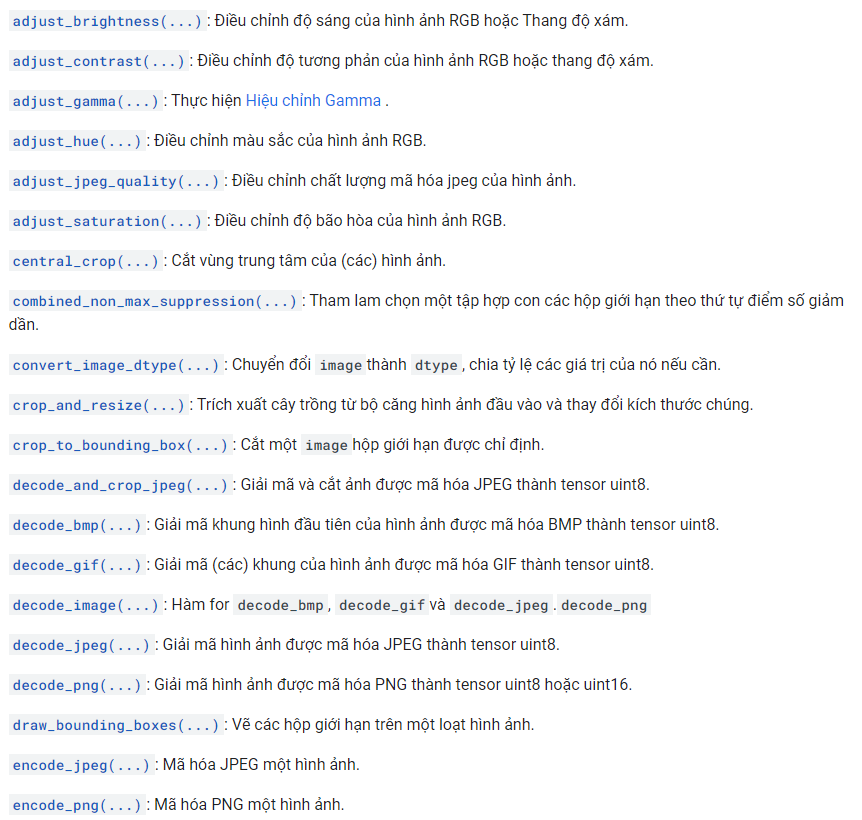
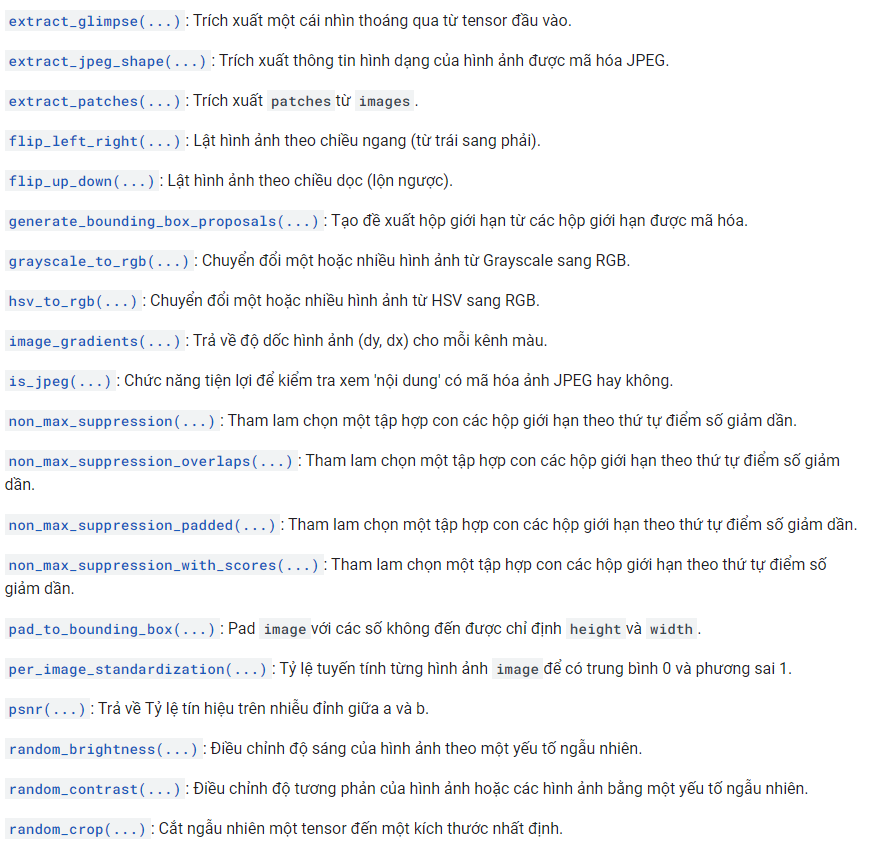
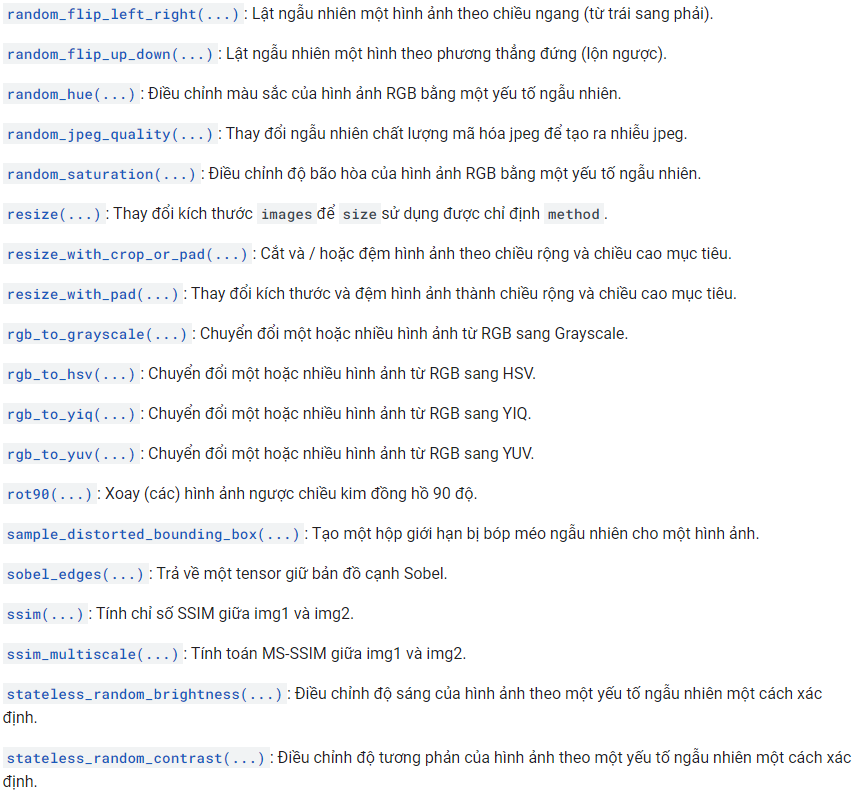
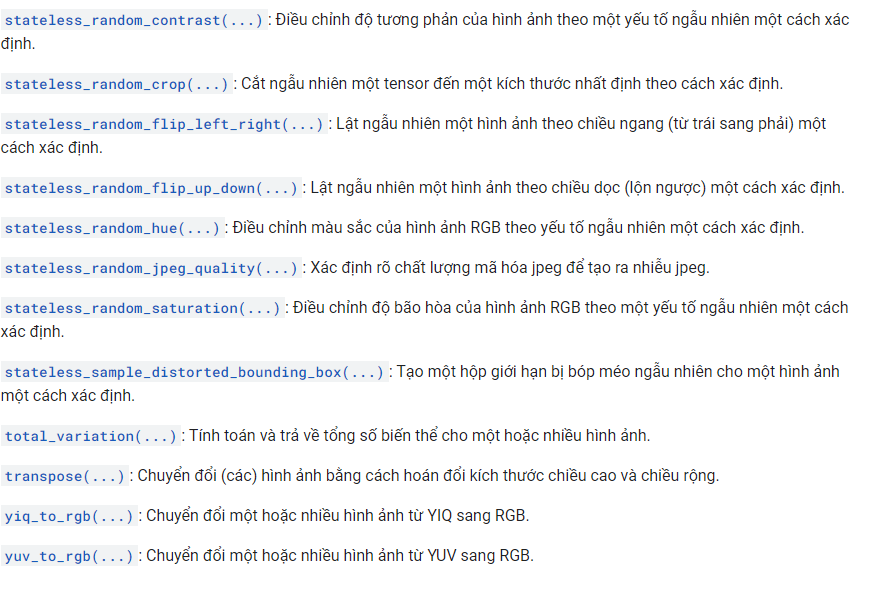

# Hiển thị dữ liệu hình ảnh trong TensorBoard

## thiết lập tensorboard

In [11]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [12]:
from datetime import datetime
import io
import itertools
from packaging import version

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.10.0


In [13]:
#tải bộ dữ liệu fashion mnist
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

# Names of the integer classes, i.e., 0 -> T-short/top, 1 -> Trouser, etc.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
print("Shape: ", train_images[0].shape)
print("Label: ", train_labels[0], "->", class_names[train_labels[0]])

Shape:  (28, 28)
Label:  9 -> Ankle boot


## Hình dung một hình ảnh duy nhất

In [15]:
# Reshape the image for the Summary API.
img = np.reshape(train_images[0], (-1, 28, 28, 1))

In [18]:
# Clear out any prior log data.
#!rm -rf logs

# Sets up a timestamped log directory.
logdir = "logs/train_data/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
file_writer = tf.summary.create_file_writer(logdir)

# Using the file writer, log the reshaped image.
with file_writer.as_default():
    tf.summary.image("Training data", img, step=0)

In [19]:
%tensorboard --logdir logs/train_data

Reusing TensorBoard on port 6006 (pid 24492), started 0:01:34 ago. (Use '!kill 24492' to kill it.)

## Hình dung nhiều hình ảnh

In [20]:
with file_writer.as_default():
    # Don't forget to reshape.
    images = np.reshape(train_images[0:25], (-1, 28, 28, 1))
    tf.summary.image("25 training data examples", images, max_outputs=25, step=0)

%tensorboard --logdir logs/train_data

Reusing TensorBoard on port 6006 (pid 24492), started 0:03:43 ago. (Use '!kill 24492' to kill it.)

## Ghi dữ liệu hình ảnh tùy ý

In [21]:
# Clear out prior logging data.
!rm -rf logs/plots

logdir = "logs/plots/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir)

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

def image_grid():
    """Return a 5x5 grid of the MNIST images as a matplotlib figure."""
    # Create a figure to contain the plot.
    figure = plt.figure(figsize=(10,10))
    for i in range(25):
        # Start next subplot.
        plt.subplot(5, 5, i + 1, title=class_names[train_labels[i]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)

    return figure

# Prepare the plot
figure = image_grid()
# Convert to image and log
with file_writer.as_default():
    tf.summary.image("Training data", plot_to_image(figure), step=0)

%tensorboard --logdir logs/plots

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Xây dựng bộ phân loại hình ảnh

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [43]:
# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/train_data/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [44]:
def log_confusion_matrix(epoch, logs):
    # Use the model to predict the values from the validation dataset.
    test_pred_raw = model.predict(test_images)
    test_pred = np.argmax(test_pred_raw, axis=1)

    # Calculate the confusion matrix.
    cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
    # Log the confusion matrix as an image summary.
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)

    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [45]:
# Train the classifier.
model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0, # Suppress chatty output
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)
# Start TensorBoard.
%tensorboard --logdir logs/

313/313 [==============================] - 1s 684us/step


Reusing TensorBoard on port 6006 (pid 10084), started 5:28:45 ago. (Use '!kill 10084' to kill it.)

# tensorflow operations
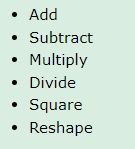